<a href="https://colab.research.google.com/github/Balara00/ML_Lab01/blob/main/label_1/ML_Lab01_label_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required packages and libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1, L2, L3, L4]
AGE_LABEL = L2
FEATURES = [f"feature_{i}" for i in range (1,257)]

Importing dataset

In [3]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Mounted at /content/drive


In [4]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML_Lab 1"

In [5]:
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [6]:
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [7]:
test = pd.read_csv(f"{WORKING_DIR}/test.csv")
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


In [8]:
train[LABELS + [FEATURES[i] for i in range(0, 256, 32)]].describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 260 entries, feature_1 to label_4
dtypes: float64(257), int64(3)
memory usage: 56.6 MB


Scaling dataset

In [9]:
from sklearn.preprocessing import StandardScaler

x_train = {}
y_train = {}
x_valid = {}
y_valid = {}
x_test = {}
y_test = {}

for target_label in LABELS:
  train_ds = train[train['label_2'].notna()] if target_label == 'label_2' else train
  valid_ds = valid
  test_ds = test

  scaler = StandardScaler()
  x_train[target_label] = pd.DataFrame(scaler.fit_transform(train_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = train_ds[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(valid_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = valid_ds[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(test_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_test[target_label] = test_ds[target_label]

In [10]:
y_train['label_2']

480      25.0
481      25.0
482      25.0
483      25.0
484      25.0
         ... 
28515    29.0
28516    29.0
28517    29.0
28518    29.0
28519    29.0
Name: label_2, Length: 28040, dtype: float64

In [11]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train[L1], y_train[L1])

SVC(kernel='linear')

In [12]:
from sklearn import metrics

y_pred = clf.predict(x_valid[L1])
y_pred_test_before = clf.predict(x_test[L1])

In [13]:
print('Predicted labels before feature engineering:', y_pred_test_before)

Predicted labels before feature engineering: [45 45 45 45 45 45  5  5  5  5 14  5  5  5  5  5  5  5 60 60 60 60 60 60
 60 60 19 19 19 19 19 19 19 19 19 19 39 19 19 19 19 19 11 11 11 11 11 11
 11 11 11 11 11 11 52 52 52 52 52 52 52 52 52 52 52 25 25 25 25 25 25 24
 25 25 25 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 51
 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 35 35 35 35 35 35 35 35
 56 56 56 56 56 56 56 56 56 56 56 53 53 53 53 53 53 22 53 53 53  3  3  3
  3  3  3  3  3  3  3 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 43 43
 43 43 43 43 43 43 43 43 43 58 58 58 58 58 58 58 58 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 17 17 17 17 17 17 17
 17 17 17 17 17 17  2  2  2  2  2  2  2  2  2  2  2  2 47 47 47 47 47 47
 47 47 47 58 47 47 47 54 54 54 54 54 54 54 54 54 54 54 21 21 21 21 21 21
 21 21 21 21 21 21 34 34 34 34 34 34 34 34 34 23 23 23 23 23 23 23 23 23
 23 23

In [14]:
print (metrics.confusion_matrix(y_valid[L1], y_pred))
print (metrics.accuracy_score(y_valid[L1], y_pred))
print (metrics.precision_score(y_valid[L1], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L1], y_pred, average="weighted"))

[[13  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
0.9906666666666667
0.9914608132608133
0.9906666666666667


# Feature Engineering

### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=100)
x_train_new = selector.fit_transform(x_train[L1], y_train[L1])
print("Shape: ", x_train_new.shape)

Shape:  (28520, 100)


In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_new, y_train[L1])

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(selector.transform(x_valid[L1]))

print (metrics.confusion_matrix(y_valid[L1], y_pred))
print (metrics.accuracy_score(y_valid[L1], y_pred))
print (metrics.precision_score(y_valid[L1], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L1], y_pred, average="weighted"))

[[12  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  1]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  9]]
0.976
0.9774185666185666
0.976


### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(x_train[L1])
x_train_trf = pd.DataFrame(pca.transform(x_train[L1]))
x_valid_trf = pd.DataFrame(pca.transform(x_valid[L1]))

print("Shape after PCA: ", x_train_trf.shape)

Shape after PCA:  (28520, 67)


In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_trf, y_train[L1])

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(x_valid_trf)

print (metrics.confusion_matrix(y_valid[L1], y_pred))
print (metrics.accuracy_score(y_valid[L1], y_pred))
print (metrics.precision_score(y_valid[L1], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L1], y_pred, average="weighted"))

[[12  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
0.9813333333333333
0.9835733337182255
0.9813333333333333


### PCA with SelectKBest

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Step 1: Feature selection with SelectKBest
selector = SelectKBest(f_classif, k=120)
x_train_new = selector.fit_transform(x_train[L1], y_train[L1])

# Step 2: Apply PCA to the selected features
pca = PCA(n_components=0.95, svd_solver='full')
x_train_pca = pca.fit_transform(x_train_new)

print("Shape after PCA: ", x_train_pca.shape)

Shape after PCA:  (28520, 53)


In [16]:
# Create a validation set with the same feature transformations
x_valid_new = selector.transform(x_valid[L1])
x_valid_pca = pca.transform(x_valid_new)

In [17]:
x_test_new = selector.transform(x_test[L1])
x_test_pca = pca.transform(x_test_new)

In [18]:
# Train a classifier (SVM) on the PCA-transformed features
clf = svm.SVC(kernel='linear')
clf.fit(x_train_pca, y_train[L1])

SVC(kernel='linear')

In [19]:
# Make predictions on the validation set
y_pred = clf.predict(x_valid_pca)

# Evaluate the classifier's performance
print(metrics.confusion_matrix(y_valid[L1], y_pred))
print(metrics.accuracy_score(y_valid[L1], y_pred))
print(metrics.precision_score(y_valid[L1], y_pred, average="weighted"))
print(metrics.recall_score(y_valid[L1], y_pred, average="weighted"))

[[12  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  1]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  9]]
0.9573333333333334
0.9599147112147112
0.9573333333333334


In [20]:
y_pred_test_after = clf.predict(x_test_pca)
print('Predicted labels after feature engineering:', y_pred_test_after)

Predicted labels after feature engineering: [45 45 45 45 45 30  5  5 29  5  5  5  5  5  5  5  5  5 60 60 60 60 60 60
 60 60 19 19 19 19 19 19 19 19 19 19 39 19 19 19 19 19 11 11 11 11 11 11
 34 11 11 11 11 11 52 36 52 52 52 52 52 52 57 52 52 25 25 25 25 25 25 25
 25 25 25 46 46 46 46 46 46 46 46 54 46 46 46 46 46 46 46 46 46 46 46 51
 40 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 35 35 35 35 35 35 35 35
 56 56 56 56 56 56 56 56 56 56 56 53 53 53 53 53 53 29 53 53 53  3  3  3
  3  3  3  3  3  3  3 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 43 43
 43 43 43 43 43 43 43 43 43 36 58 43 58 58 58 58 58 44 44 20 44 44 44 44
 44 44 44 44 44 44 44 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 55 55 55 55 55 55 55 55 55 55 55  7 55 55 55 55 55 17  2 17 24 17 21 17
 17 17 17 17 17 15  2  2  2  2  2  2  2  2  2  2  2  2 47 47 47 47 47 47
 47 47 47 26 47 47 47 54 54 54 54 54 54 54 54 46 54 54 21 21 21 21 21 21
 21 21 21 21 21 21 34 34 34 34 34 34 34 34 34 23 23 23 23 23 23 23 23 23
 23 23 

**Output**

In [21]:
# output_df = pd.DataFrame({
#     'Predicted labels before feature engineering': y_pred_test_before,
#     'Predicted labels after feature engineering': y_pred_test_after,
#     'No. of new features': x_test_pca.shape[1]
# })

# # for i in range(x_test_pca.shape[1]):
# #   output_df[f'new_feature_{i+1}'] = x_test_pca[:, i]

# for i in range(257):  # Looping from 0 to 256 inclusive
#     column_name = f'new_feature_{i+1}'  # Construct the column name

#     # Check if the feature exists in x_test_pca
#     if i < x_test_pca.shape[1]:
#         output_df[column_name] = x_test_pca[:, i]  # Fill with the feature data
#     else:
#         output_df[column_name] = None  # Fill with blank or NaN values


# output_df.head()

# Create the base DataFrame
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test_before,
    'Predicted labels after feature engineering': y_pred_test_after,
    'No of new features': [x_test_pca.shape[1]] * len(y_pred_test_before)
})

# List to store all the new feature Series
new_features = []

# Extract new features from x_test_pca
for i in range(min(256, x_test_pca.shape[1])):
    column_name = f'new_feature_{i+1}'
    new_features.append(pd.Series(x_test_pca[:, i], name=column_name))

# If there are any remaining columns to reach 256, fill them with NaN
for i in range(x_test_pca.shape[1], 256):
    column_name = f'new_feature_{i+1}'
    new_features.append(pd.Series([None] * len(output_df), name=column_name))

# Concatenate all the new feature columns to output_df
output_df = pd.concat([output_df] + new_features, axis=1)

output_df.head()


,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,45,45,53,4.805567,-1.438069,0.090364,2.551673,4.231264,1.100793,5.043517,...,None,None,None,None,None,None,None,None,None,None
1,45,45,53,9.345223,-5.411362,0.840693,4.581131,6.606455,-0.092466,0.942460,...,None,None,None,None,None,None,None,None,None,None
2,45,45,53,4.521340,-2.593603,2.615978,2.822541,3.496725,0.257350,-0.184816,...,None,None,None,None,None,None,None,None,None,None
3,45,45,53,5.989986,-1.653742,-1.939967,0.604153,0.699108,-0.925274,1.045066,...,None,None,None,None,None,None,None,None,None,None
4,45,45,53,5.000318,-0.770415,-1.402748,4.502910,2.215434,1.262620,3.622290,...,None,None,None,None,None,None,None,None,None,None


In [22]:
# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"{WORKING_DIR}/190572L_label_1_final.csv", index=False)


## Co-relation Matrix

In [ ]:
# Convert the PCA-transformed features (x_train_pca) to a Pandas DataFrame
x_train_pca_df = pd.DataFrame(x_train_pca)

# Calculate the correlation matrix
corr_matrix = x_train_pca_df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.000000e+00,-5.956056e-17,-7.708409e-17,7.355989e-17,-3.349183e-16,5.192244e-16,5.652479e-16,-4.069231e-16,-5.445208e-16,-2.101902e-16,...,-1.497567e-16,1.239729e-16,2.579847e-16,1.332700e-16,1.716091e-16,-2.957228e-17,-1.278851e-16,5.320478e-17,3.855956e-17,-1.999494e-16
1,-5.956056e-17,1.000000e+00,5.025006e-16,-2.249041e-16,2.057411e-16,-5.809316e-17,1.805652e-16,-2.507403e-17,1.378398e-16,8.354954e-18,...,3.909047e-17,5.834430e-17,-7.116230e-17,3.721315e-16,-1.216858e-16,9.916946e-17,-3.622388e-17,1.341077e-16,3.564294e-16,-3.544234e-17
2,-7.708409e-17,5.025006e-16,1.000000e+00,9.337801e-17,-2.485082e-16,-3.850791e-16,1.738167e-16,-1.500523e-16,2.960970e-16,-6.303923e-17,...,-1.040321e-16,7.897742e-17,-9.696430e-17,-1.269623e-16,1.439304e-16,5.492883e-17,8.985752e-17,-2.439194e-16,4.238268e-17,1.198352e-16
3,7.355989e-17,-2.249041e-16,9.337801e-17,1.000000e+00,-3.491328e-16,-1.797830e-18,-3.501281e-18,2.017042e-16,-2.862785e-16,8.518984e-17,...,-4.264063e-18,-2.209528e-16,1.410893e-16,-4.042668e-17,1.908860e-16,-2.289410e-16,-3.676747e-17,-1.724795e-16,-7.482208e-17,-6.676223e-17
4,-3.349183e-16,2.057411e-16,-2.485082e-16,-3.491328e-16,1.000000e+00,5.937750e-16,-1.068803e-16,-5.511720e-16,-6.699926e-17,-1.355174e-17,...,-1.918762e-16,-8.076457e-17,-9.602652e-17,1.111539e-16,6.349733e-17,9.028486e-18,-2.621654e-16,-2.669750e-17,1.405354e-16,-3.056043e-16
5,5.192244e-16,-5.809316e-17,-3.850791e-16,-1.797830e-18,5.937750e-16,1.000000e+00,-6.831951e-17,-1.218149e-16,5.137339e-16,1.181299e-16,...,5.036921e-17,1.923122e-16,7.509667e-17,-1.156829e-16,3.143536e-16,-2.753628e-17,-1.991329e-17,-6.277859e-17,5.728869e-18,2.394313e-17
6,5.652479e-16,1.805652e-16,1.738167e-16,-3.501281e-18,-1.068803e-16,-6.831951e-17,1.000000e+00,2.544650e-17,-2.500202e-16,9.431341e-17,...,-1.692130e-17,-2.648364e-17,5.768705e-17,-7.873030e-17,-1.699535e-16,-1.689891e-16,-7.193043e-17,6.533818e-17,4.319602e-17,-2.636205e-16
7,-4.069231e-16,-2.507403e-17,-1.500523e-16,2.017042e-16,-5.511720e-16,-1.218149e-16,2.544650e-17,1.000000e+00,1.014987e-16,1.247641e-16,...,1.317544e-16,1.529092e-16,-3.039247e-17,-1.948523e-16,1.055824e-16,1.348289e-16,1.140576e-16,-9.172461e-17,-9.131392e-18,-2.089743e-16
8,-5.445208e-16,1.378398e-16,2.960970e-16,-2.862785e-16,-6.699926e-17,5.137339e-16,-2.500202e-16,1.014987e-16,1.000000e+00,8.040535e-17,...,-1.345011e-16,5.247132e-17,2.002861e-17,-1.083427e-16,-3.908187e-16,-4.690146e-17,1.180313e-16,7.286358e-18,1.412435e-17,-8.136234e-17
9,-2.101902e-16,8.354954e-18,-6.303923e-17,8.518984e-17,-1.355174e-17,1.181299e-16,9.431341e-17,1.247641e-16,8.040535e-17,1.000000e+00,...,-1.057171e-16,1.191496e-16,1.285134e-16,3.172220e-19,-5.978503e-18,-1.433635e-16,9.169128e-17,5.627178e-18,6.708163e-17,9.149041e-17


<Axes: >

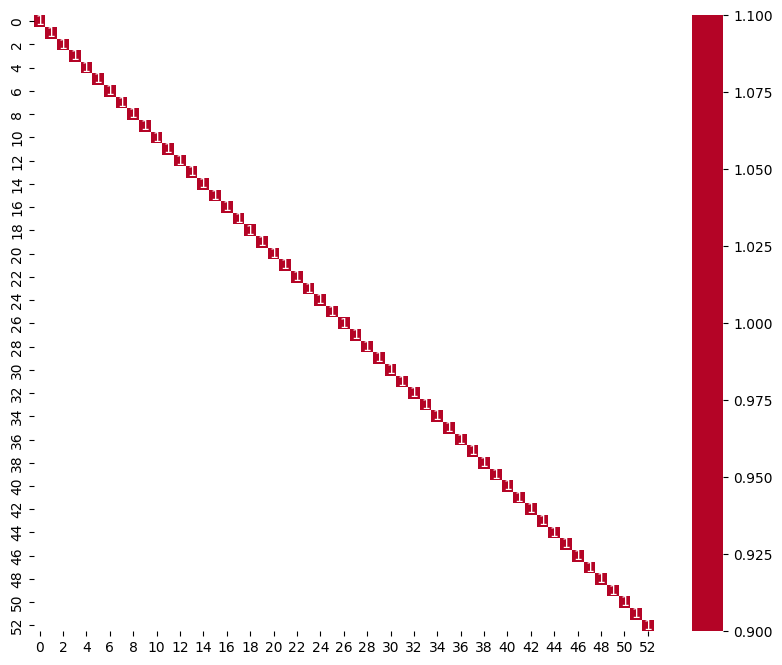

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = corr_matrix[(corr_matrix > corr_treshold) | (corr_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)